In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine=engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

### Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
* Chosen dates for trip: 2020-02-09 - 2020-02-15 (back before COVID yay)

In [82]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
(session.query(Measurement.date)
 .order_by(Measurement.date.desc())
 .first())

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)



Query Date:  2016-08-23


In [163]:
# Perform a query to retrieve the data and precipitation scores

sel = [Measurement.date,
      Measurement.prcp]

last_12 = (session.query(*sel)
 .filter(Measurement.date >= '2016-08-23')
 .filter(Measurement.date <= '2017-08-23')
#  .group_by(Measurement.date) ### IF I DON'T DO THIS..then 2230 reults
 .all())

last_12

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [164]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
last_12_df = pd.DataFrame(last_12)
last_12_index = last_12_df.set_index('date')
last_12_sort = last_12_index.sort_values(by='date', ascending=True)

last_12_sort


,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


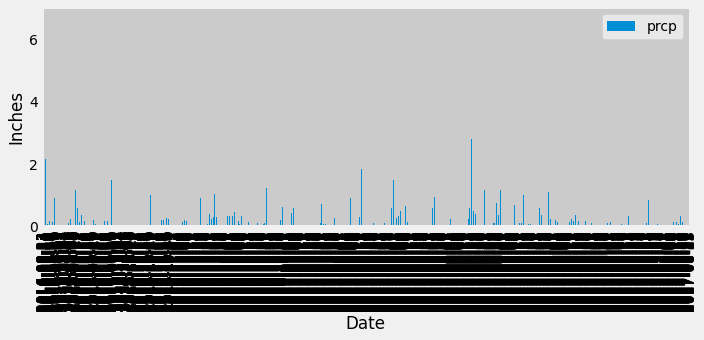

In [187]:
# Use Pandas Plotting with Matplotlib to plot the data

# ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', 
# '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']


                # dates = [last_12_sort.iloc[::250, 0]]

#             x_axis = np.arange(len(last_12_sort.index))
#             tick_locations = [value for value in x_axis]

df = pd.DataFrame(last_12_sort, columns=['prcp'])
# df.set_index('date')
df.plot.bar(figsize=(10,5)) #ax = 

                # last_12_sort.plot(kind="bar", figsize=(20,5))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()

                # ax.set_xticks(last_12_sort[::250])
                # ax.set_xticklabels(last_12_sort.index[::250], rotation=90)

                # plt.xticks(tick_locations, last_12_sort.index, rotation="vertical")
plt.show()




In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(f"Sum of Precipitation: {last_12_df.prcp.sum()}")
print(f"Mean of Precipitation: {last_12_df.prcp.mean()}")
print(f"Median of Precipitation: {last_12_df.prcp.median()}")

Sum of Precipitation: 355.57000000000005
Mean of Precipitation: 0.17646153846153848
Median of Precipitation: 0.02


#### STATION PART

In [15]:
# Design a query to show how many stations are available in this dataset?
(session.query(Station.station)
 .count())

9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
(session.query(Measurement.station, func.count(Measurement.date))
 .group_by(Measurement.station)
 .order_by(func.count(Measurement.date).desc())
 .all())

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

(session.query(*sel)
.filter(Measurement.station == 'USC00519281')
.all())


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [66]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_temp = (session.query(Measurement.station, Measurement.tobs)
                .filter(Measurement.date > '2016-08-23')
                .filter(Measurement.station == 'USC00519281')
                .all())

# NEEED TO DO histogram

#### 
#### 
#### 
#### Plot the results as a histogram with bins=12.
#### 
#### 
#### 
#### 
#### 
#### 
#### 
#### 
#### 
#### 
#### 

## Bonus Challenge Assignment

In [53]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [22]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [25]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [26]:
# Plot the daily normals as an area plot with `stacked=False`
